In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

defunciones = pd.read_csv('defunciones_clean.csv')


# Tendencias Temporales:
# 1. ¿Cómo ha evolucionado la tasa de mortalidad general a lo largo de los años?

df = pd.read_csv('defunciones_clean.csv') # Cargar los datos limpios

df['año_registrado'] = df['año_registrado'].astype(int) # Asegurarse de que 'año_registrado' es del tipo correcto

defunciones_por_año = df.groupby('año_registrado').size() # Contar el número de defunciones por año

# Graficar la tasa de mortalidad por año
plt.figure(figsize=(10, 6))
defunciones_por_año.plot(kind='bar')
plt.title('Tasa de Mortalidad por Año')
plt.xlabel('Año Registrado')
plt.ylabel('Número de Defunciones')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()



C:\Users\halm9\AppData\Local\Temp\ipykernel_21000\1540720954.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('defunciones_clean.csv')
C:\Users\halm9\AppData\Local\Temp\ipykernel_21000\1540720954.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  defunciones_top_causas_por_año = defunciones_por_año_causa.groupby('año_registrado').apply(lambda x: x.nlargest(5, 'conteo')).reset_index(drop=True)
C:\Users\halm9\AppData\Local\Temp\ipykernel_21000\1540720954.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` fo

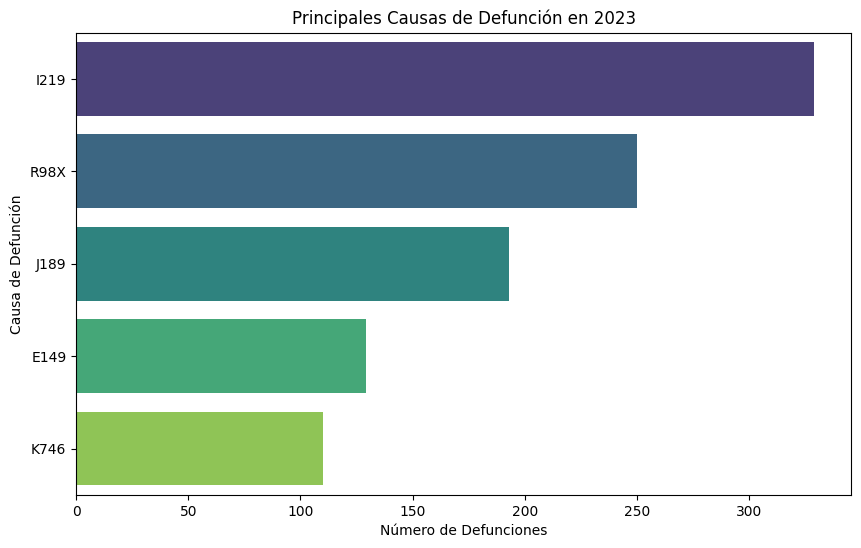

In [18]:
# Causas de Defunción:
# 2. ¿Cuáles son las principales causas de defunción registradas cada año?
# Paso 1: Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame de defunciones
df = pd.read_csv('defunciones_clean.csv')

# Cargar el mapeo de Código CIE-10 desde 'CIE.csv' (ajusta este paso si ya lo has hecho)
cie_df = pd.read_csv('CIE.csv')
cie_mapeo = pd.Series(cie_df['descripcion'].values, index=cie_df['codigo'].astype(str)).to_dict()

# Aplicar el mapeo al DataFrame para traducir los códigos CIE-10 a descripciones
df['causa'] = df['causa'].astype(str)
df['descripcion_cie_10'] = df['causa'].map(cie_mapeo)

# Asegurarse de que 'año_registrado' es del tipo correcto
df['año_registrado'] = df['año_registrado'].astype(int)

# Agrupar por año y descripción CIE-10, contar el número de defunciones
defunciones_por_año_causa = df.groupby(['año_registrado', 'descripcion_cie_10']).size().reset_index(name='conteo')

# Para cada año, seleccionar las 5 principales causas de defunción
defunciones_top_causas_por_año = defunciones_por_año_causa.groupby('año_registrado').apply(lambda x: x.nlargest(5, 'conteo')).reset_index(drop=True)

# Visualizar las principales causas de defunción para un año específico
# Seleccionar un año específico para visualización, por ejemplo, el más reciente
año_especifico = df['año_registrado'].max()
defunciones_año_especifico = defunciones_top_causas_por_año[defunciones_top_causas_por_año['año_registrado'] == año_especifico]

plt.figure(figsize=(10, 6))
sns.barplot(x='conteo', y='descripcion_cie_10', data=defunciones_año_especifico, palette='viridis')
plt.title(f'Principales Causas de Defunción en {año_especifico}')
plt.xlabel('Número de Defunciones')
plt.ylabel('')
plt.show()



C:\Users\halm9\AppData\Local\Temp\ipykernel_21000\3385947266.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('defunciones_clean.csv')
C:\Users\halm9\AppData\Local\Temp\ipykernel_21000\3385947266.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  defunciones_top_causas_por_año = defunciones_por_año_causa.groupby('año_registrado').apply(lambda x: x.nlargest(5, 'conteo')).reset_index(drop=True)


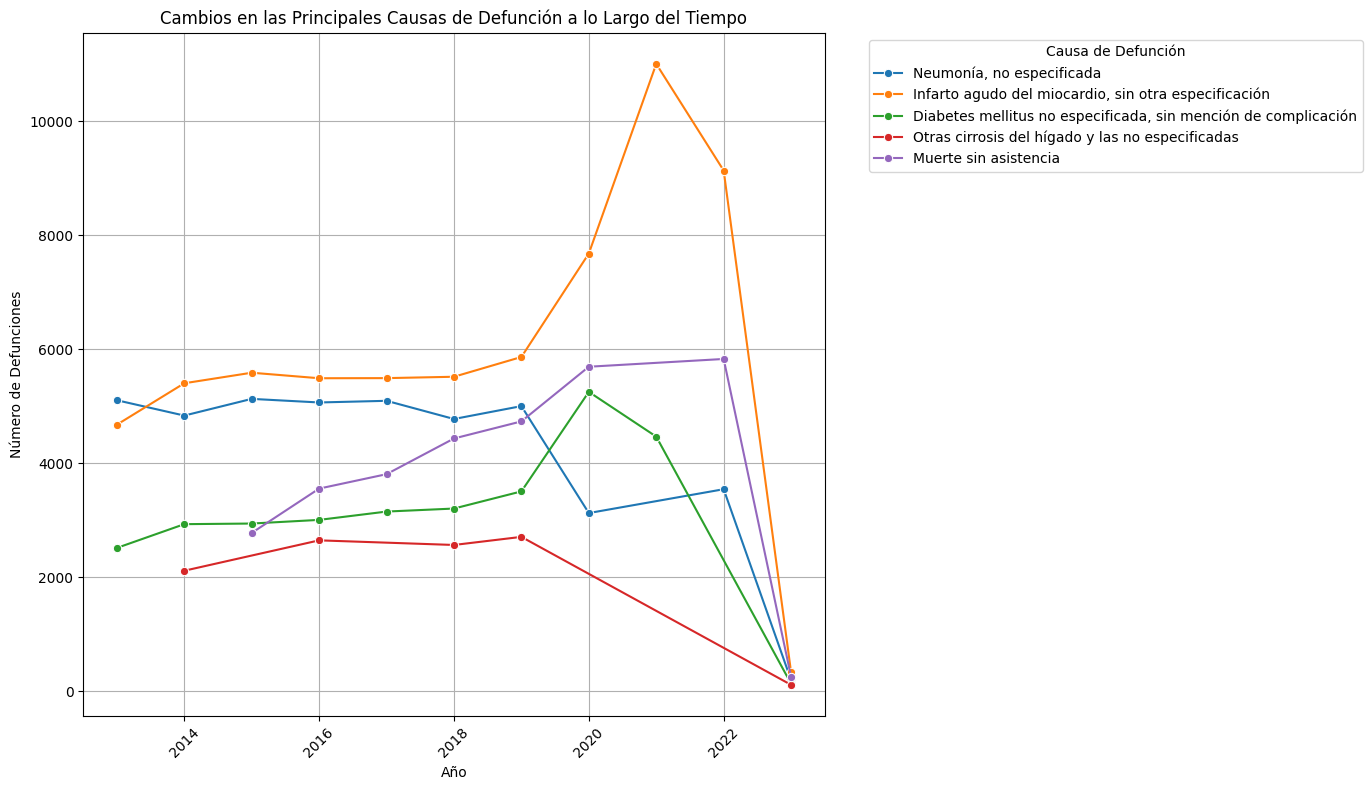

In [15]:
# Causas de Defunción:
# 3. ¿Ha habido cambios significativos en las principales causas de defunción a lo largo del tiempo?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame de defunciones
df = pd.read_csv('defunciones_clean.csv')

# Cargar el mapeo de Código CIE-10 desde 'CIE.csv'
cie_df = pd.read_csv('CIE.csv')

# Crear el diccionario de mapeo para CIE-10
cie_mapeo = pd.Series(cie_df['descripcion'].values, index=cie_df['codigo'].astype(str)).to_dict()

# Aplicar el mapeo al DataFrame
df['causa'] = df['causa'].astype(str)
df['descripcion_cie_10'] = df['causa'].map(cie_mapeo)

# Agrupar por año y descripción CIE-10, contar el número de defunciones
defunciones_por_año_causa = df.groupby(['año_registrado', 'descripcion_cie_10']).size().reset_index(name='conteo')

# Para cada año, seleccionar las 5 principales causas de defunción
defunciones_top_causas_por_año = defunciones_por_año_causa.groupby('año_registrado').apply(lambda x: x.nlargest(5, 'conteo')).reset_index(drop=True)

plt.figure(figsize=(14, 8))

# Filtrar por las causas más comunes en general para simplificar la visualización
top_causas_generales = defunciones_top_causas_por_año['descripcion_cie_10'].value_counts().index[:5]
df_filtrado = defunciones_top_causas_por_año[defunciones_top_causas_por_año['descripcion_cie_10'].isin(top_causas_generales)]

sns.lineplot(data=df_filtrado, x='año_registrado', y='conteo', hue='descripcion_cie_10', marker='o')
plt.title('Cambios en las Principales Causas de Defunción a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Defunciones')
plt.legend(title='Causa de Defunción', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# Demografía:
# 4. ¿Existe alguna diferencia notable en las causas de defunción entre diferentes grupos 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame de defunciones desde 'defunciones_clean.csv'
df = pd.read_csv('defunciones_clean.csv')

# Cargar el mapeo de Código CIE-10 desde 'CIE.csv'
cie_df = pd.read_csv('CIE.csv')

# Crear el diccionario de mapeo para CIE-10
cie_mapeo = pd.Series(cie_df['descripcion'].values, index=cie_df['codigo'].astype(str)).to_dict()

# Asegúrate de que la columna 'causa' es del tipo correcto (str)
df['causa'] = df['causa'].astype(str)

# Reemplazar los códigos CIE-10 por descripciones usando el mapeo
df['descripcion_cie_10'] = df['causa'].map(cie_mapeo)

# Definir los límites de los grupos de edad
bins = [0, 12, 18, 35, 50, 65, 80, 100]
labels = ['0-12', '13-18', '19-35', '36-50', '51-65', '66-80', '81+']
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

# Identificar las 5 causas más comunes de defunción en general
top_causas = df['descripcion_cie_10'].value_counts().nlargest(5).index

# Filtrar el DataFrame para incluir solo las top causas
df_top_causas = df[df['descripcion_cie_10'].isin(top_causas)]

# Agrupar por grupo de edad y descripción CIE-10, contar el número de defunciones
defunciones_por_grupo_causa = df_top_causas.groupby(['grupo_edad', 'descripcion_cie_10']).size().reset_index(name='conteo')

# Visualizar las diferencias en las causas de defunción entre grupos de edad para las top causas
plt.figure(figsize=(14, 8))
sns.barplot(x='conteo', y='descripcion_cie_10', hue='grupo_edad', data=defunciones_por_grupo_causa, palette='viridis')
plt.title('Diferencias en las Principales Causas de Defunción entre Grupos de Edad')
plt.xlabel('Número de Defunciones')
plt.ylabel('Causa de Defunción')
plt.legend(title='Grupo de Edad')
plt.tight_layout()
plt.show()